**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

In [2]:
# loading requires libraries
import pandas as pd


Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [5]:
df.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [6]:
# so we got the number belong to each category

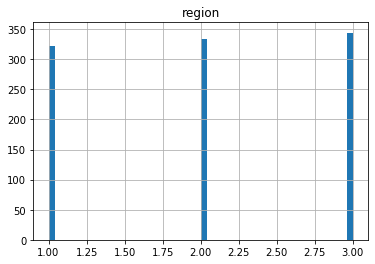

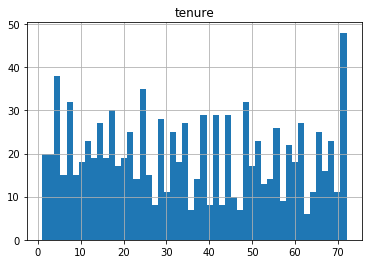

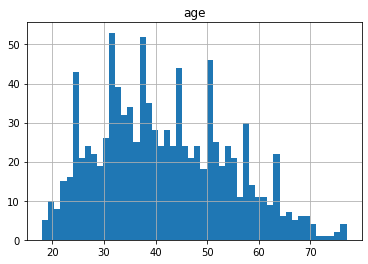

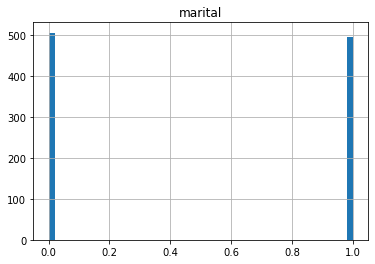

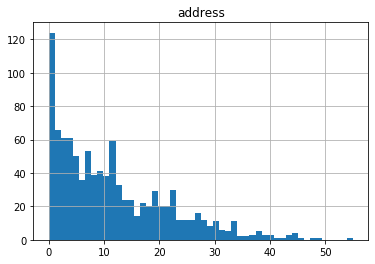

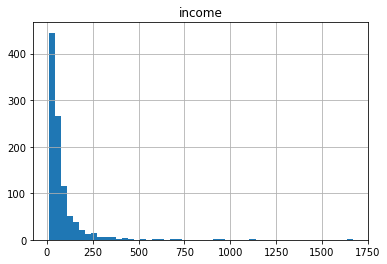

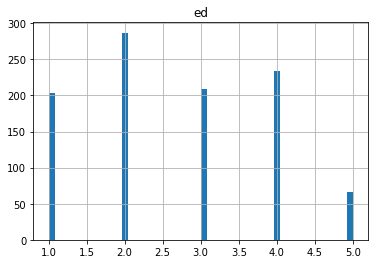

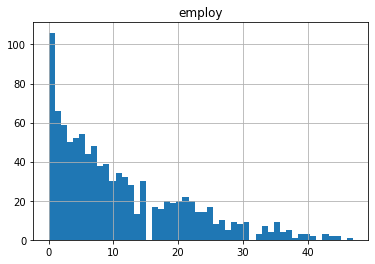

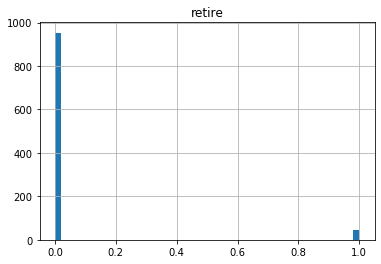

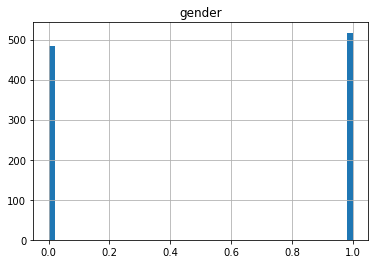

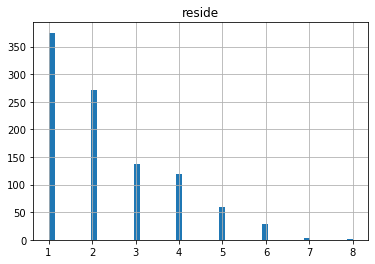

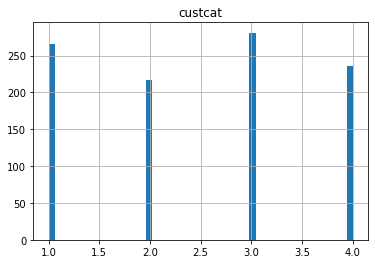

In [9]:
# visualize the features
for x in df.columns.to_list():
    df.hist(x, bins=50)

In [13]:
#drag out our features 
X_ = df.drop(['custcat'], axis=1).values
Y_ = df['custcat'].values

In [17]:
print(type(X_), type(Y_))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [18]:
X_.shape

(1000, 11)

In [19]:
Y_.shape

(1000,)

In [21]:
Y_[:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalise data

In [23]:
# zero mean and unit variance
from sklearn.preprocessing import StandardScaler

X_normalised = StandardScaler().fit_transform(X_.astype('float'))

In [24]:
X_normalised[:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Train Test split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalised, Y_, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 11) (800,)
(200, 11) (200,)


## KNN classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

### Initiate training

In [29]:
# define value of K
k = 4  # as there are 4 classes in our target var
# instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)
#fit the training data into the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [30]:
# Now predict on the test set
y_pred = knn.predict(X_test)
y_pred[:5]

array([4, 2, 3, 2, 3], dtype=int64)

In [32]:
y_prob = knn.predict_proba(X_test)
y_prob[:5]

array([[0.  , 0.25, 0.25, 0.5 ],
       [0.  , 0.75, 0.  , 0.25],
       [0.  , 0.25, 0.75, 0.  ],
       [0.  , 0.5 , 0.5 , 0.  ],
       [0.  , 0.25, 0.5 , 0.25]])

## Accuracy Evaluation

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the Jaccard_similarity_score.

In [33]:
from sklearn.metrics import accuracy_score

print('Train_set accuracy: %.2f' %accuracy_score(y_train, knn.predict(X_train)))
print('Test_set accuracy: %.2f' %accuracy_score(y_test, y_pred))

Train_set accuracy: 0.54
Test_set accuracy: 0.33


#### What about other K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [34]:
import numpy as np

Multiple_K = 10
mean_accuracy = np.zeros((Multiple_K - 1))
std_accuracy = np.zeros((Multiple_K - 1))
ConfusionMat = []

In [35]:
print(mean_accuracy.shape, std_accuracy.shape)

(9,) (9,)


In [36]:
for n in range(1, Multiple_K):
    
    # train the model and predict for each value
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    
    mean_accuracy[n - 1] = accuracy_score(y_test, y_test_pred)
    std_accuracy[n-1]=np.std(y_test_pred==y_test)/np.sqrt(y_test_pred.shape[0])

## Plot the accuracy values and test against K values

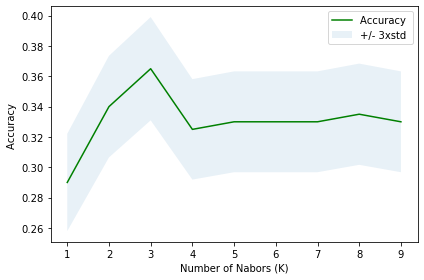

In [37]:
import matplotlib.pyplot as plt

plt.plot(range(1,Multiple_K),mean_accuracy,'g')
plt.fill_between(range(1,Multiple_K),mean_accuracy - 1 * std_accuracy,mean_accuracy + 1 * std_accuracy, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [38]:
print('The best accuracy was ', mean_accuracy.max(), "with K= ", mean_accuracy.argmax() + 1)

The best accuracy was  0.365 with K=  3
